In [5]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
OUT_DIR = os.path.join(os.getcwd(),"out")

SRC_DIR = os.path.join(os.getcwd(),"resources")

### figure formatting

In [7]:
font={
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 11,
}

plt.rcParams.update(font)

def create_fig():
    figure,ax = plt.subplots(figsize=(4,2.5))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir,filename+fformat), bbox_inches='tight')

## Infinite plane

In [ ]:
# get file from
dat = pd.read_csv(os.path.join(SRC_DIR,"inf_plane_data.csv"))

   Unnamed: 0  patch_size   col_raw   col_abs    col_rel    col_rt   dif_raw  \
0           0       100.0  0.018685  1.981315  99.065748  0.005100  0.010706   
1           1        50.0  0.018685  1.981315  99.065748  0.003271  0.010706   
2           2        20.0  0.341468  1.658532  82.926609  0.013056  0.212120   

    dif_abs    dif_rel    dif_rt  ...  var_rt_40  var_rt_45  var_rt_50  \
0  1.989294  99.464679  0.005331  ...   0.003001   0.003136   0.002533   
1  1.989294  99.464679  0.003514  ...   0.002001   0.001999   0.003131   
2  1.787880  89.394013  0.011099  ...   0.011577   0.010767   0.008998   

   var_rt_55  var_rt_60  var_rt_65  var_rt_70  var_rt_75  var_rt_80  var_rt_85  
0   0.003174   0.003126   0.002011   0.003033   0.002999   0.001997   0.002144  
1   0.003192   0.003634   0.003865   0.003998   0.002999   0.003321   0.002690  
2   0.009103   0.009068   0.011263   0.010205   0.008075   0.009843   0.008800  

[3 rows x 95 columns]


colocated

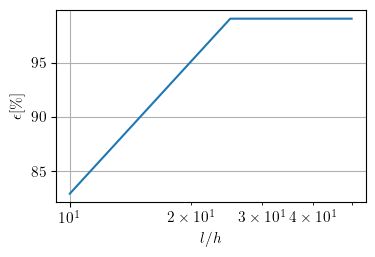

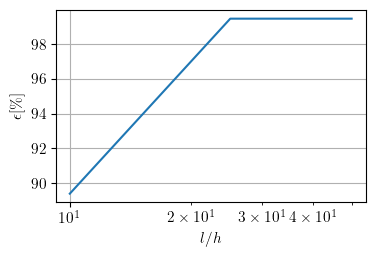

In [9]:
num_patches = (50/dat["patch_size"][:])**2
patch_ratio = dat["patch_size"][:]/2

for code in ["col","dif"]:
# relative error as a function of patch size
    f,a = create_fig()
    plt.semilogx(patch_ratio,dat[code+"_rel"])
    plt.ylabel('$$\epsilon [\%]$$')
    plt.xlabel("$$ l/h $$")
    plt.show()
    export_fig(f,code+"_rel")



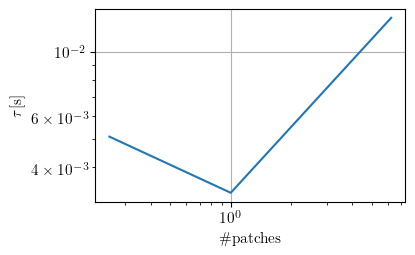

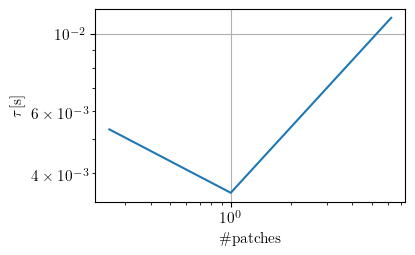

In [10]:
for code in ["col","dif"]:
    # runtime as a function of patch size
    f,a = create_fig()
    plt.loglog(num_patches,dat[code+"_rt"])
    plt.ylabel('$$\\tau [\mathrm{s}]$$')
    plt.xlabel("$$ \mathrm{\# patches}$$")
    plt.show()
    export_fig(f,code+"_rt")

as a function of angle

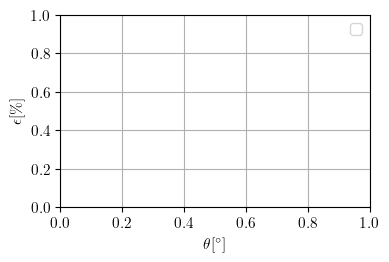

In [11]:

angles = np.arange(5,85,5)
f,a = create_fig()
legend = []
for i,npatches in enumerate(num_patches[4:]):
    data_list = []
    for ang in angles:
        data_list.append(dat["var_rel_"+f'{ang}'][i+3])

    plt.plot(angles,data_list)
    print(npatches)

    legend.append(f'{int(npatches)} patches')

plt.ylabel('$$\epsilon [\%]$$')
plt.xlabel("$$\\theta [^{\circ}]$$")
#plt.ylim([0, 100])
plt.legend(legend)
plt.show()
export_fig(f,"var_rel")